# Exploratory Data Analysis

### Import libraries

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

### Loading dataset

`cleaned_data` is the dataset we produced in [Data Cleaning.ipynb](http://localhost:8888/notebooks/Desktop/SC1015-Project/Data%20Cleaning.ipynb)

In [2]:
data_eda = pd.read_csv('../Datasets/cleaned_data.csv')
data_cuisines = pd.read_csv("../Datasets/cuisines.csv", squeeze=True)

In [3]:
display(data_eda.head(2))
print("Cleaned dataset has {} rows".format(len(data_eda)))

,Unnamed: 0,id,name,street_address,price,cuisine,rating,latitude,longitude,price_mid,...,Western Variety,Vietnamese,Beijing,Russian,Foochow,Hakka,Caribbean,Filipino,Irish,Dong Bei
0,0,0,1-V:U,"The Outpost Hotel Sentosa, 10 Artillery Avenue...",$31 - $50,Asian Variety,3.5,1.252299,103.820211,40.5,...,0,0,0,0,0,0,0,0,0,0
1,1,1,10 At Claymore,"Pan Pacific Orchard, 10 Claymore Road Level 2",$51 - $80,Multi-Cuisine,4.0,1.307401,103.829904,65.5,...,0,0,0,0,0,0,0,0,0,0


Cleaned dataset has 2833 rows


`data_cuisines` is a `Series` representing the cuisine categories. `cuisine_cats` use its indices.

In [4]:
display(data_cuisines.head(2))
print("There are {} cuisines identified.".format(len(data_cuisines)))

0    Asian Variety
1    Multi-Cuisine
Name: 0, dtype: object

There are 52 cuisines identified.


In [5]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2833 non-null   int64  
 1   id                   2833 non-null   int64  
 2   name                 2833 non-null   object 
 3   street_address       2833 non-null   object 
 4   price                2833 non-null   object 
 5   cuisine              2833 non-null   object 
 6   rating               2833 non-null   float64
 7   latitude             2833 non-null   float64
 8   longitude            2833 non-null   float64
 9   price_mid            2833 non-null   float64
 10  cuisine_cats         2833 non-null   object 
 11  mult_cuisines        2833 non-null   int64  
 12  Asian Variety        2833 non-null   int64  
 13  Multi-Cuisine        2833 non-null   int64  
 14  Korean               2833 non-null   int64  
 15  Belgian              2833 non-null   i

The cleaned dataset contains 2833 rows

> **Name** : Name of each restaurant  
> **Street Address** : The location address of the restaurant   
> **Price** : Price range of restaurant   
> **Cuisine** : Culinary category of food that each restaurant specializes in   
> **Rating** : The restaurants customer ratings out of 5 stars   
> **Latitude** : The geographic coordinates of the restaurant indicating its north-south position on Earth   
> **Longitude** : The geographic coordinates of the restaurant indicating its east-west position on Earth   
> **Price Mid** : The median of a restaurants price range   
> **Cuisine Cat** : Contains the array of indexed restaurant cuisines   
> **Mult-Cuisine to Dong Bei** : Columns of specific cuisine types indicating the restaurants specific cuisine

### Univariate Analysis of Price

Let us first begin by analysing our price data

In [6]:
Price = pd.DataFrame(data_eda['price_mid'])
Price.head()

,price_mid
0,40.5
1,65.5
2,25.5
3,15.5
4,4.5


In [7]:
Price.describe()

,price_mid
count,2833.000000
mean,20.138193
std,30.098849
min,4.500000
25%,4.500000
50%,15.500000
75%,25.500000
max,400.500000


<AxesSubplot:>

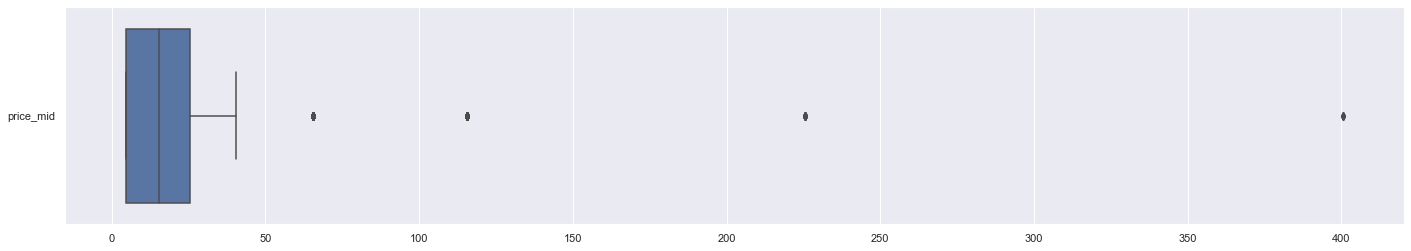

In [8]:
#Pricing boxplot
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = Price, orient = "h")

<AxesSubplot:ylabel='Count'>

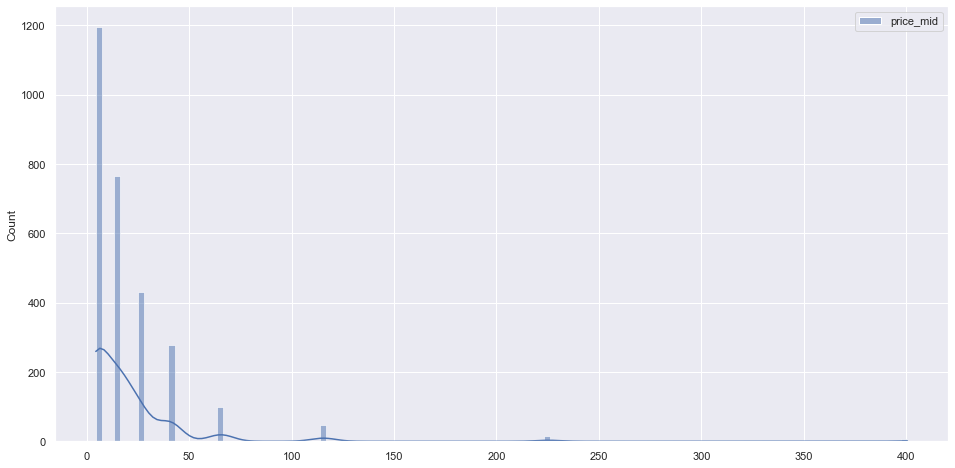

In [9]:
#Price histogram plot
f = plt.figure(figsize=(16, 8))
sb.histplot(data = Price, kde = True)

<AxesSubplot:>

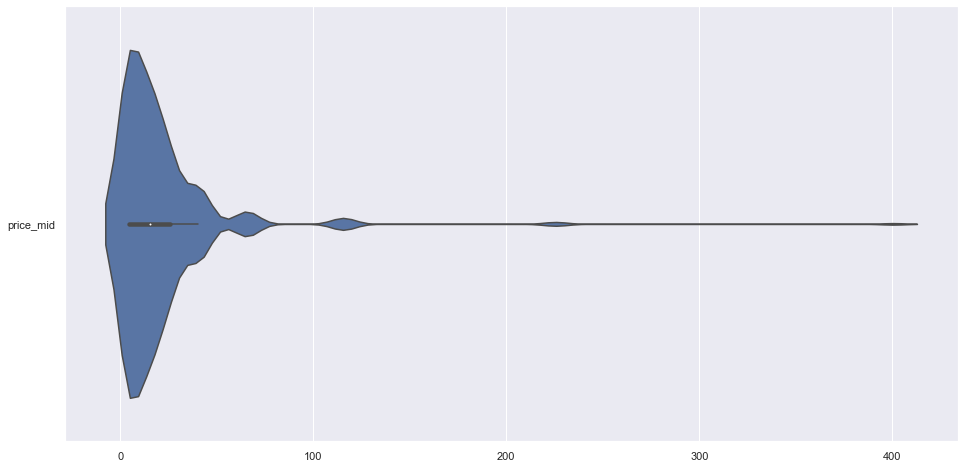

In [10]:
#Price violinplot
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = Price, orient = "h")

### Univariate Analysis of Ratings

Ratings : 7
3.5    1924
4.0     671
3.0     129
4.5      86
2.5      16
5.0       6
2.0       1
Name: rating, dtype: int64


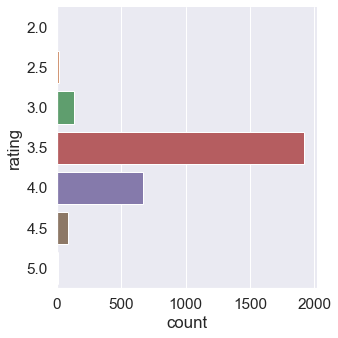

In [42]:
# Ratings in the Dataset
print("Ratings :", len(data_eda["rating"].unique()))

# Reviews in each Rating
print(data_eda["rating"].value_counts())
sb.catplot(y = "rating", data = data_eda, kind = "count")

### Univariate Analysis of Cuisines

In [12]:
cuisine = data_eda.loc[:,'Asian Variety':'Dong Bei']
cuisine.head()

,Asian Variety,Multi-Cuisine,Korean,Belgian,Singaporean,Chinese,Cantonese,Hong Kong,Teochew,Malay,...,Western Variety,Vietnamese,Beijing,Russian,Foochow,Hakka,Caribbean,Filipino,Irish,Dong Bei
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cuisine_count = cuisine.apply(pd.value_counts).T
cuisine_count.head()

,0,1
Asian Variety,2803,30
Multi-Cuisine,2721,112
Korean,2712,121
Belgian,2821,12
Singaporean,2520,313


In [14]:
cuisine_count = cuisine_count.iloc[: , 1:]
cuisine_count = cuisine_count.rename(columns={1:"Quantity"})

In [15]:
cuisine_count = cuisine_count.sort_values(by=['Quantity'], ascending=False)
cuisine_count = cuisine_count.reset_index()

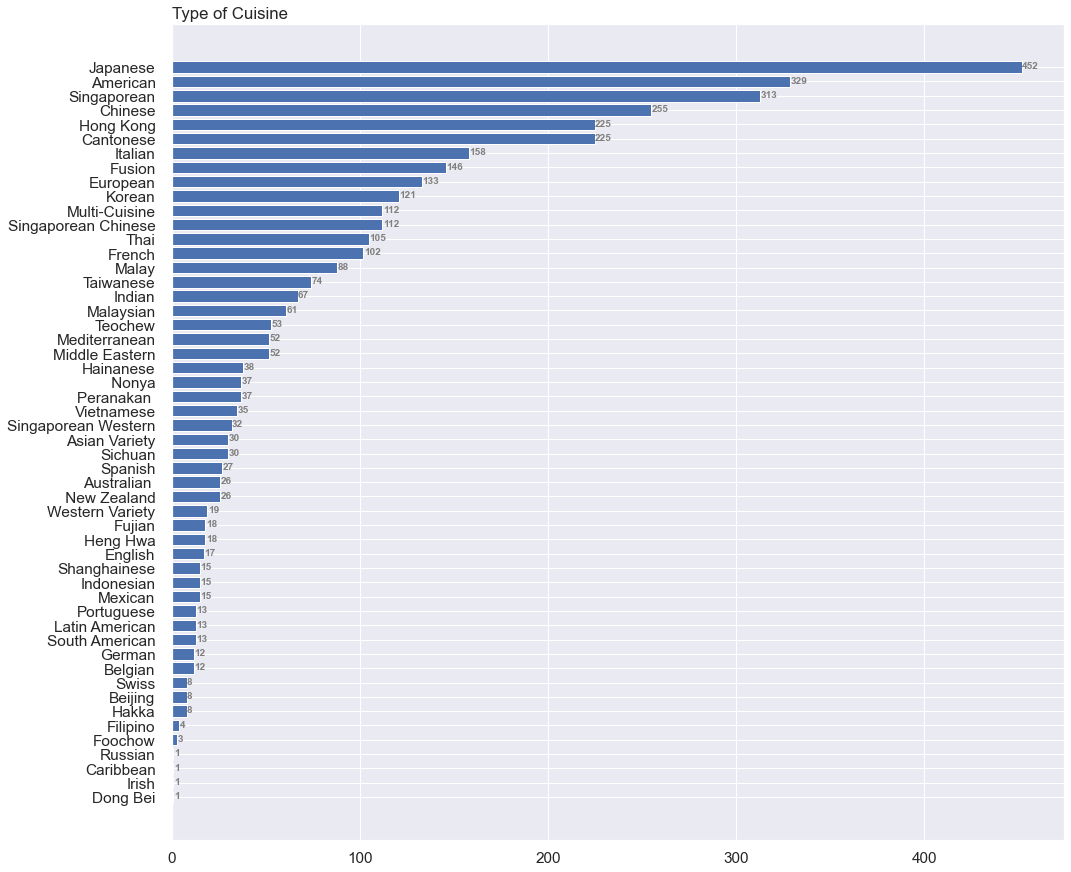

In [29]:
fig, ax = plt.subplots(figsize =(16, 15))
ax.barh(cuisine_count['index'], cuisine_count['Quantity'])

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Type of Cuisine',
             loc ='left', )

plt.show()

In [17]:
cuisine['Number of Cuisine'] = cuisine.sum(axis=1)

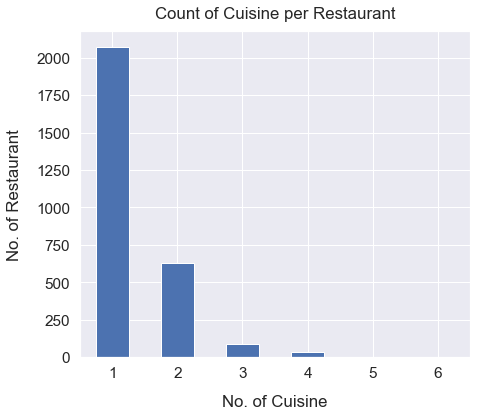

In [18]:
sb.set(font_scale=1.4)
cuisine['Number of Cuisine'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("No. of Cuisine", labelpad=14)
plt.ylabel("No. of Restaurant", labelpad=14)
plt.title("Count of Cuisine per Restaurant", y=1.02);

### Bivariate Analysis of Cuisines and Price

In [19]:
cuisine_price = cuisine
cuisine_price['Price'] = Price
cuisine_price.head(2)

,Asian Variety,Multi-Cuisine,Korean,Belgian,Singaporean,Chinese,Cantonese,Hong Kong,Teochew,Malay,...,Beijing,Russian,Foochow,Hakka,Caribbean,Filipino,Irish,Dong Bei,Number of Cuisine,Price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,40.5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.5


<AxesSubplot:xlabel='Number of Cuisine', ylabel='Price'>

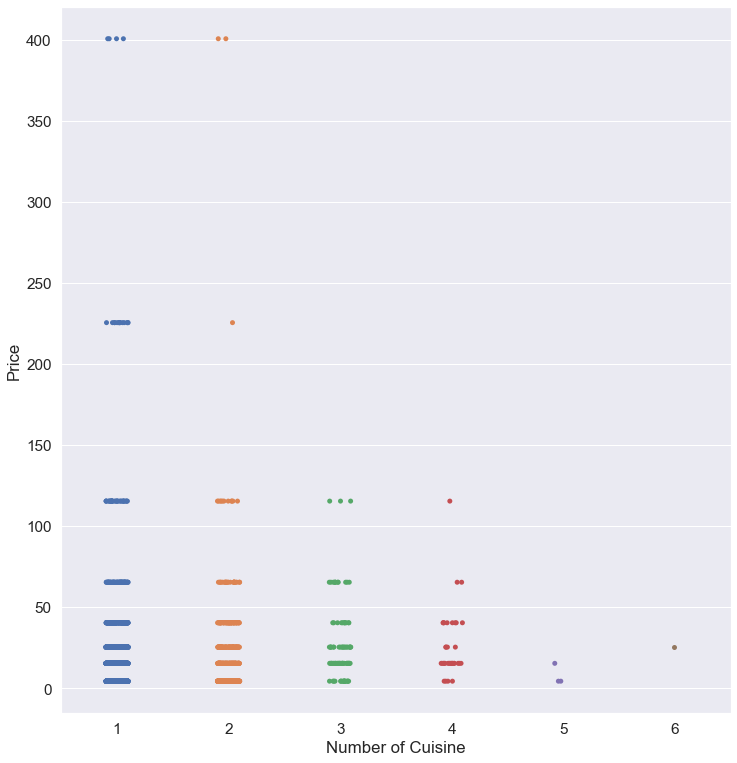

In [40]:
plt.subplots(figsize =(12, 13))
sb.stripplot(x=cuisine_price['Number of Cuisine'], y=cuisine_price['Price'], data=cuisine_price)

### Bivariate Analysis of Cuisines and Rating

In [21]:
cuisine_rating = cuisine
cuisine_rating['Rating'] = data_eda['rating']
cuisine_rating.head(2)

,Asian Variety,Multi-Cuisine,Korean,Belgian,Singaporean,Chinese,Cantonese,Hong Kong,Teochew,Malay,...,Russian,Foochow,Hakka,Caribbean,Filipino,Irish,Dong Bei,Number of Cuisine,Price,Rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,40.5,3.5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,65.5,4.0


<AxesSubplot:xlabel='Number of Cuisine', ylabel='Rating'>

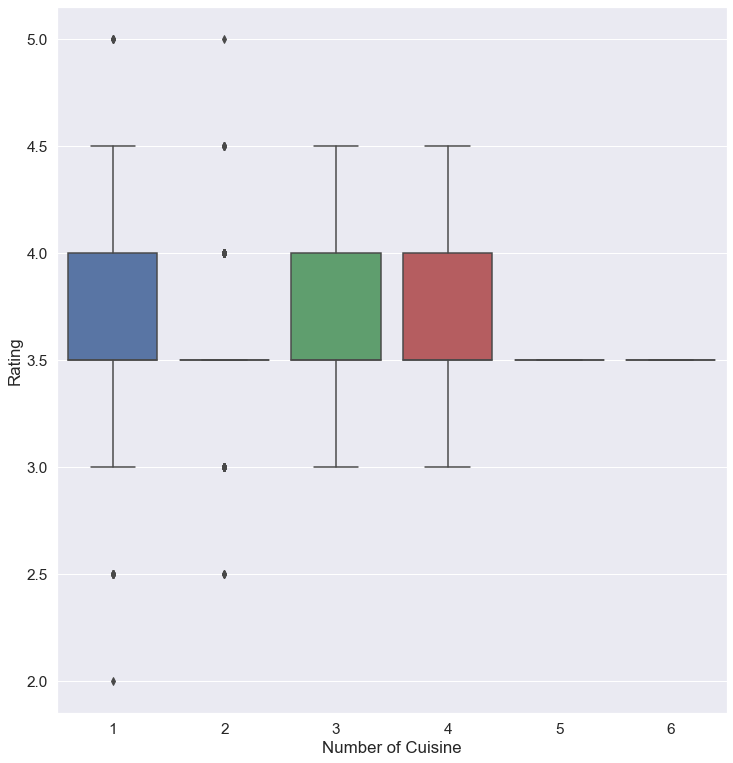

In [38]:
plt.subplots(figsize =(12, 13))
sb.boxplot(x=cuisine_price['Number of Cuisine'], y=cuisine_price['Rating'], data=cuisine_rating)

### Bivariate Analysis of Price and Rating

<AxesSubplot:xlabel='Rating', ylabel='Price'>

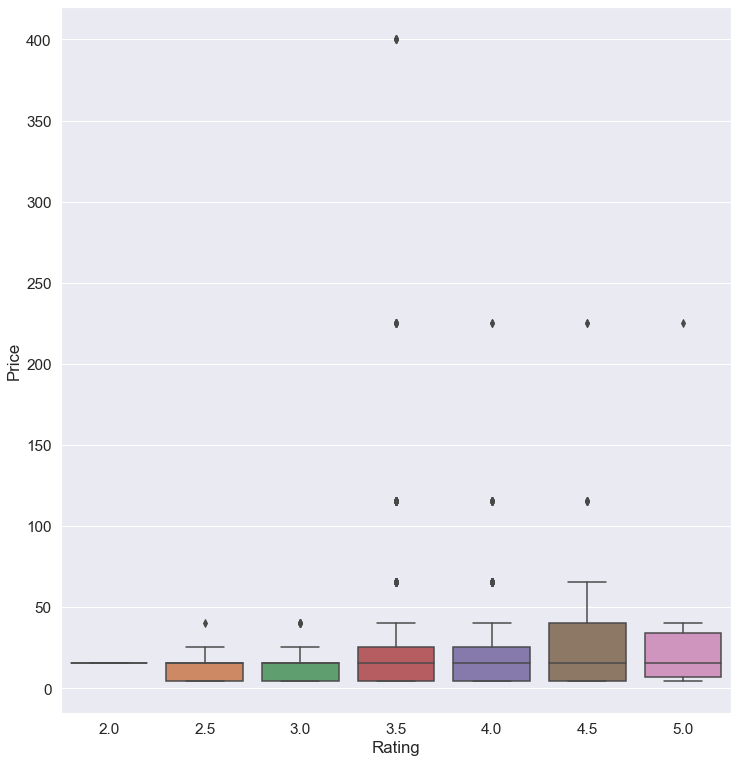

In [39]:
plt.subplots(figsize =(12, 13))
sb.boxplot(y=cuisine_price['Price'], x=cuisine_price['Rating'], data=cuisine_rating)